In [6]:
!pip install catboost

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from catboost import CatBoostClassifier
import json

In [8]:
 df = pd.read_csv('/content/final_matches.csv')
 df

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,goal_diff,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,-2,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,-1,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,2,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,2,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,-2,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,3,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,-1,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,-2,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,-2,0,2025-05-10


In [9]:
df.drop(['goal_diff'],axis=1,inplace = True)

In [10]:
df

,date,comp,round,day,venue,result,opponent,xg,xga,poss,...,pk,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,is_home,prev_date
0,2020-12-06,Premier League,Matchweek 11,Sun,Away,0,Tottenham,0.6,0.3,69.0,...,0,0,Arsenal,2021,11.000000,2.000000,0.600000,0.0,0,NaN
1,2020-12-13,Premier League,Matchweek 12,Sun,Home,0,Burnley,1.6,1.4,65.0,...,0,0,Arsenal,2021,14.500000,4.000000,1.100000,0.0,1,2020-12-06
2,2021-05-19,Premier League,Matchweek 37,Wed,Away,3,Crystal Palace,1.8,1.0,68.0,...,0,0,Arsenal,2021,11.666667,3.666667,1.333333,1.0,0,2020-12-13
3,2021-05-23,Premier League,Matchweek 38,Sun,Home,3,Brighton,0.8,0.2,54.0,...,0,0,Arsenal,2021,12.750000,4.000000,1.200000,1.5,1,2021-05-19
4,2021-08-13,Premier League,Matchweek 1,Fri,Away,0,Brentford,1.3,1.2,64.0,...,0,0,Arsenal,2022,14.600000,4.000000,1.220000,1.2,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,Premier League,Matchweek 34,Sat,Home,3,Leicester City,2.0,1.1,56.0,...,0,0,Wolverhampton Wanderers,2025,13.600000,4.000000,1.680000,3.0,1,2025-04-20
3098,2025-05-02,Premier League,Matchweek 35,Fri,Away,0,Manchester City,0.4,0.7,37.0,...,0,0,Wolverhampton Wanderers,2025,13.000000,3.600000,1.520000,2.4,0,2025-04-26
3099,2025-05-10,Premier League,Matchweek 36,Sat,Home,0,Brighton,0.9,1.6,56.0,...,0,0,Wolverhampton Wanderers,2025,10.600000,3.000000,1.180000,1.8,1,2025-05-02
3100,2025-05-20,Premier League,Matchweek 37,Tue,Away,0,Crystal Palace,1.4,1.7,69.0,...,0,0,Wolverhampton Wanderers,2025,10.400000,2.600000,0.980000,1.2,0,2025-05-10


In [61]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

categorical_cols = ['comp','round','day','opponent','team','season']
encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

joblib.dump(encoders, "encoders.pkl")


['encoders.pkl']

In [12]:
df.drop(['venue'],axis=1,inplace = True)

In [62]:
scaler = StandardScaler()
numeric_cols = ['xg', 'xga', 'sh', 'sot', 'dist', 'fk', 'pk', 'pkatt', 'Rolling Average 5 Sh', 'rolling_avg_sot', 'rolling_avg_xg', 'Rolling win rate',]
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [14]:
df

,date,comp,round,day,result,opponent,xg,xga,poss,attendance,...,pk,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,is_home,prev_date
0,2020-12-06,0,2,3,0,22,-0.987709,-1.345068,69.0,2000.0,...,-0.323313,-0.359068,0,0,-0.581456,-1.709417,-1.671076,-1.911439,0,NaN
1,2020-12-13,0,3,3,0,5,0.203486,-0.034753,65.0,2000.0,...,-0.323313,-0.359068,0,0,0.492188,-0.238145,-0.660687,-1.911439,1,2020-12-06
2,2021-05-19,0,30,6,3,7,0.441725,-0.511231,68.0,6500.0,...,-0.323313,-0.359068,0,0,-0.376952,-0.483357,-0.189173,-0.536315,0,2020-12-13
3,2021-05-23,0,31,3,3,4,-0.749470,-1.464187,54.0,10000.0,...,-0.323313,-0.359068,0,0,-0.044634,-0.238145,-0.458610,0.151247,1,2021-05-19
4,2021-08-13,0,0,0,0,3,-0.153872,-0.272992,64.0,16479.0,...,-0.323313,-0.359068,0,1,0.522863,-0.238145,-0.418194,-0.261290,0,2021-05-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,0,27,2,3,12,0.679964,-0.392111,56.0,31518.0,...,-0.323313,-0.359068,26,4,0.216108,-0.238145,0.511363,2.213933,1,2025-04-20
3098,2025-05-02,0,28,0,0,15,-1.225948,-0.868589,37.0,53282.0,...,-0.323313,-0.359068,26,4,0.032055,-0.532399,0.188039,1.388859,0,2025-04-26
3099,2025-05-10,0,29,2,0,4,-0.630350,0.203486,56.0,31279.0,...,-0.323313,-0.359068,26,4,-0.704158,-0.973781,-0.499025,0.563785,1,2025-05-02
3100,2025-05-20,0,30,5,0,7,-0.034753,0.322606,69.0,24766.0,...,-0.323313,-0.359068,26,4,-0.765509,-1.268035,-0.903181,-0.261290,0,2025-05-10


In [15]:
df.drop(['prev_date'],axis=1,inplace = True)

In [16]:
df

,date,comp,round,day,result,opponent,xg,xga,poss,attendance,...,fk,pk,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,is_home
0,2020-12-06,0,2,3,0,22,-0.987709,-1.345068,69.0,2000.0,...,0.978043,-0.323313,-0.359068,0,0,-0.581456,-1.709417,-1.671076,-1.911439,0
1,2020-12-13,0,3,3,0,5,0.203486,-0.034753,65.0,2000.0,...,-0.634870,-0.323313,-0.359068,0,0,0.492188,-0.238145,-0.660687,-1.911439,1
2,2021-05-19,0,30,6,3,7,0.441725,-0.511231,68.0,6500.0,...,-0.634870,-0.323313,-0.359068,0,0,-0.376952,-0.483357,-0.189173,-0.536315,0
3,2021-05-23,0,31,3,3,4,-0.749470,-1.464187,54.0,10000.0,...,0.978043,-0.323313,-0.359068,0,0,-0.044634,-0.238145,-0.458610,0.151247,1
4,2021-08-13,0,0,0,0,3,-0.153872,-0.272992,64.0,16479.0,...,0.978043,-0.323313,-0.359068,0,1,0.522863,-0.238145,-0.418194,-0.261290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,0,27,2,3,12,0.679964,-0.392111,56.0,31518.0,...,0.978043,-0.323313,-0.359068,26,4,0.216108,-0.238145,0.511363,2.213933,1
3098,2025-05-02,0,28,0,0,15,-1.225948,-0.868589,37.0,53282.0,...,-0.634870,-0.323313,-0.359068,26,4,0.032055,-0.532399,0.188039,1.388859,0
3099,2025-05-10,0,29,2,0,4,-0.630350,0.203486,56.0,31279.0,...,-0.634870,-0.323313,-0.359068,26,4,-0.704158,-0.973781,-0.499025,0.563785,1
3100,2025-05-20,0,30,5,0,7,-0.034753,0.322606,69.0,24766.0,...,-0.634870,-0.323313,-0.359068,26,4,-0.765509,-1.268035,-0.903181,-0.261290,0


In [65]:
features = [
    'comp','round','day','opponent','team','season',
    'xg','xga','poss','attendance','sh','sot','dist','fk','pk','pkatt',
    'Rolling Average 5 Sh','rolling_avg_sot','rolling_avg_xg',
    'Rolling win rate','is_home'
]

X = df[features]
y = df['result']
json.dump(features, open("features.json", "w"))

In [38]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable y to ensure sequential labels starting from 0
le_y = LabelEncoder()
y_encoded = le_y.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [60]:
df

,date,comp,round,day,result,opponent,xg,xga,poss,attendance,...,fk,pk,pkatt,team,season,Rolling Average 5 Sh,rolling_avg_sot,rolling_avg_xg,Rolling win rate,is_home
0,2020-12-06,0,2,3,0,22,-0.987709,-1.345068,69.0,2000.0,...,0.978043,-0.323313,-0.359068,0,0,-0.581456,-1.709417,-1.671076,-1.911439,0
1,2020-12-13,0,3,3,0,5,0.203486,-0.034753,65.0,2000.0,...,-0.634870,-0.323313,-0.359068,0,0,0.492188,-0.238145,-0.660687,-1.911439,1
2,2021-05-19,0,30,6,3,7,0.441725,-0.511231,68.0,6500.0,...,-0.634870,-0.323313,-0.359068,0,0,-0.376952,-0.483357,-0.189173,-0.536315,0
3,2021-05-23,0,31,3,3,4,-0.749470,-1.464187,54.0,10000.0,...,0.978043,-0.323313,-0.359068,0,0,-0.044634,-0.238145,-0.458610,0.151247,1
4,2021-08-13,0,0,0,0,3,-0.153872,-0.272992,64.0,16479.0,...,0.978043,-0.323313,-0.359068,0,1,0.522863,-0.238145,-0.418194,-0.261290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,2025-04-26,0,27,2,3,12,0.679964,-0.392111,56.0,31518.0,...,0.978043,-0.323313,-0.359068,26,4,0.216108,-0.238145,0.511363,2.213933,1
3098,2025-05-02,0,28,0,0,15,-1.225948,-0.868589,37.0,53282.0,...,-0.634870,-0.323313,-0.359068,26,4,0.032055,-0.532399,0.188039,1.388859,0
3099,2025-05-10,0,29,2,0,4,-0.630350,0.203486,56.0,31279.0,...,-0.634870,-0.323313,-0.359068,26,4,-0.704158,-0.973781,-0.499025,0.563785,1
3100,2025-05-20,0,30,5,0,7,-0.034753,0.322606,69.0,24766.0,...,-0.634870,-0.323313,-0.359068,26,4,-0.765509,-1.268035,-0.903181,-0.261290,0


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=300, max_depth=12, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf= rf.predict(X_test)

print("RandomForest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
joblib.dump(rf, "rf_model.pkl")

RandomForest Accuracy: 0.6843800322061192

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.75       240
           1       0.48      0.22      0.30       142
           2       0.71      0.84      0.77       239

    accuracy                           0.68       621
   macro avg       0.63      0.62      0.61       621
weighted avg       0.66      0.68      0.66       621


Confusion Matrix:
 [[194  19  27]
 [ 56  31  55]
 [ 25  14 200]]


['rf_model.pkl']

In [40]:
cat_features = ['comp','round','day','opponent','team','season']

In [41]:
from catboost import CatBoostClassifier


In [33]:
cat_model = CatBoostClassifier(
    iterations=600,
    depth=6,
    learning_rate=0.05,
    loss_function='MultiClass',
    random_state=42,
    verbose=100
)


In [42]:
cat_model.fit(
    X_train,
    y_train,
    cat_features=cat_features,
    eval_set=(X_test, y_test),
    verbose=100
)


0:	learn: 1.0794414	test: 1.0804229	best: 1.0804229 (0)	total: 27.6ms	remaining: 16.5s
100:	learn: 0.6846216	test: 0.7406488	best: 0.7406488 (100)	total: 2s	remaining: 9.91s
200:	learn: 0.5833502	test: 0.6837185	best: 0.6837185 (200)	total: 4.02s	remaining: 7.97s
300:	learn: 0.5080762	test: 0.6558530	best: 0.6558427 (298)	total: 5.97s	remaining: 5.93s
400:	learn: 0.4570537	test: 0.6411914	best: 0.6407848 (398)	total: 8.08s	remaining: 4.01s
500:	learn: 0.4113163	test: 0.6316949	best: 0.6313983 (494)	total: 11.3s	remaining: 2.24s
599:	learn: 0.3728597	test: 0.6275792	best: 0.6269076 (574)	total: 13.3s	remaining: 0us

bestTest = 0.6269075503
bestIteration = 574

Shrink model to first 575 iterations.


In [67]:
y_pred_cat = cat_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("CatBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
cat_model.save_model("catboost_model.cbm")


CatBoost Accuracy: 0.6843800322061192

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.75       240
           1       0.48      0.22      0.30       142
           2       0.71      0.84      0.77       239

    accuracy                           0.68       621
   macro avg       0.63      0.62      0.61       621
weighted avg       0.66      0.68      0.66       621


Confusion Matrix:
 [[194  19  27]
 [ 56  31  55]
 [ 25  14 200]]


In [68]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Determine the number of unique classes from y_train
num_classes = len(np.unique(y_train))

model_boost = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    random_state=42,
    num_class=num_classes # Explicitly set the number of classes
)

param_dist = {
    'n_estimators': [200, 300, 400, 500, 600],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'min_child_weight': [1, 2, 3, 5, 7],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

tuner = RandomizedSearchCV(
    estimator=model_boost,
    param_distributions=param_dist,
    n_iter=30,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

tuner.fit(X_train, y_train)
joblib.dump(best_xgb, "xgb_best.pkl")

Fitting 3 folds for each of 30 candidates, totalling 90 fits


['xgb_best.pkl']

In [45]:
print("Best Params:", tuner.best_params_)
print("Best CV Accuracy:", tuner.best_score_)


Best Params: {'subsample': 0.8, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.05, 'gamma': 0.3, 'colsample_bytree': 0.7}
Best CV Accuracy: 0.6715034260378879


In [56]:
best_xgb = tuner.best_estimator_

y_pred_xgb = best_xgb.predict(X_test)

print("Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Tuned XGBoost Accuracy: 0.6843800322061192

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.81      0.75       240
           1       0.48      0.22      0.30       142
           2       0.71      0.84      0.77       239

    accuracy                           0.68       621
   macro avg       0.63      0.62      0.61       621
weighted avg       0.66      0.68      0.66       621


Confusion Matrix:
 [[194  19  27]
 [ 56  31  55]
 [ 25  14 200]]


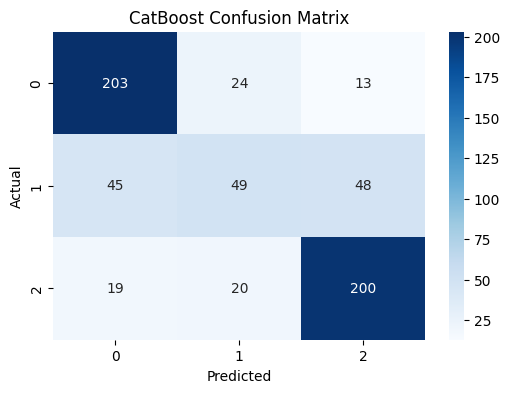

In [49]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_cat), annot=True, fmt="d", cmap="Blues")
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


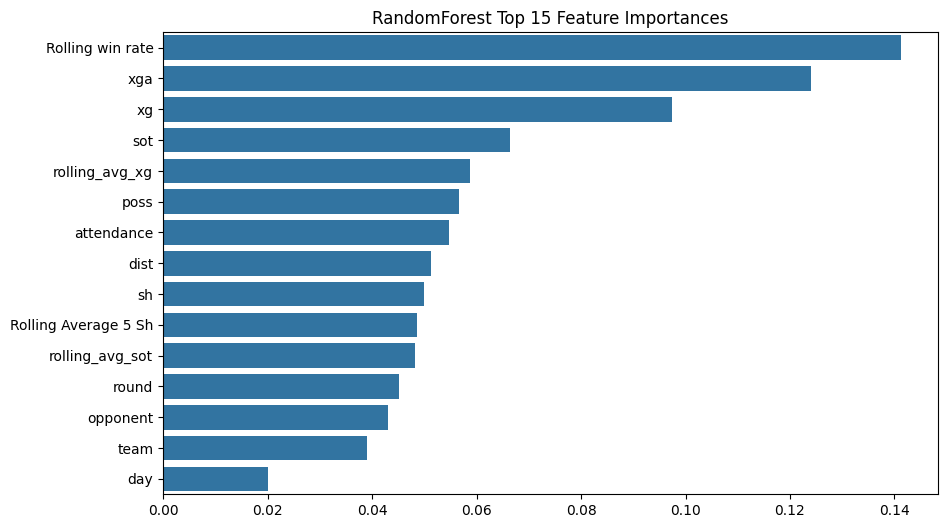

In [50]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices][:15], y=np.array(features)[indices][:15])
plt.title("RandomForest Top 15 Feature Importances")
plt.show()


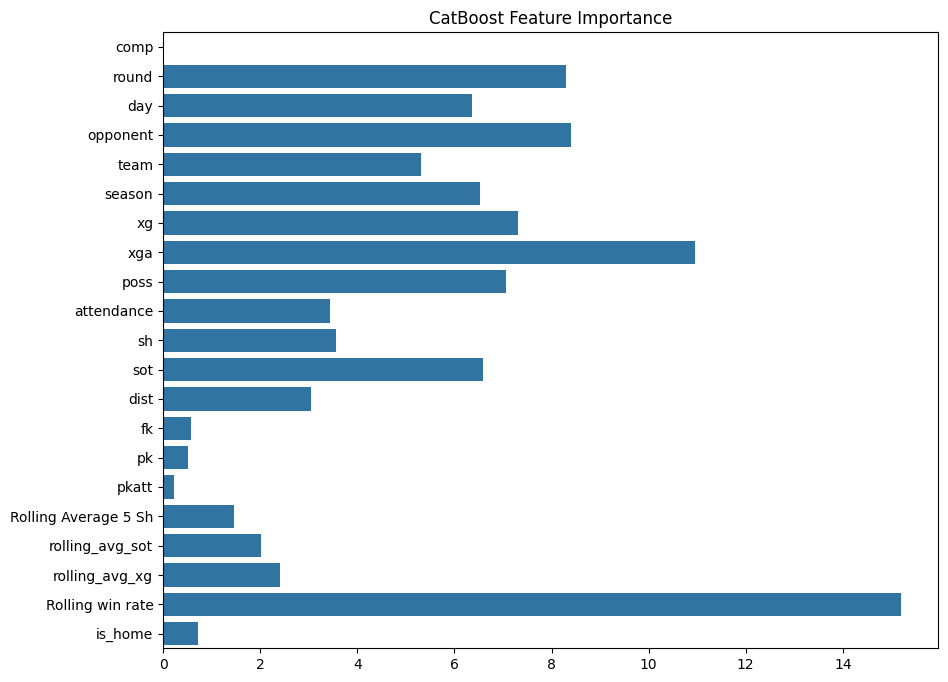

In [51]:
fi = cat_model.get_feature_importance()
plt.figure(figsize=(10,8))
sns.barplot(y=features, x=fi)
plt.title("CatBoost Feature Importance")
plt.show()


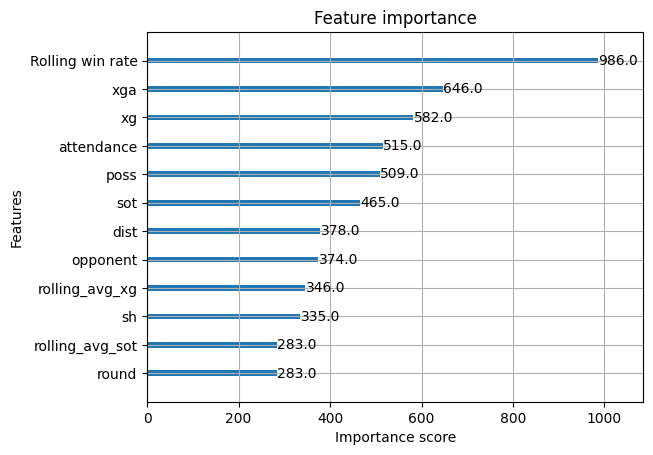

In [52]:
from xgboost import plot_importance
plot_importance(best_xgb, max_num_features=12)
plt.show()


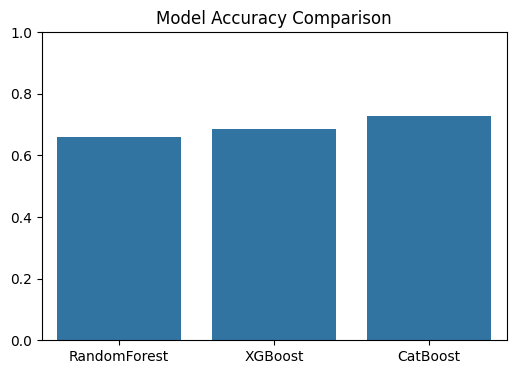

In [57]:
accuracies = {
    "RandomForest": accuracy_score(y_test, y_pred_rf),
    "XGBoost": accuracy_score(y_test, y_pred_xgb),
    "CatBoost": accuracy_score(y_test, y_pred_cat)
}

plt.figure(figsize=(6,4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()
